# MSc in AI - CE6002 & CS5062


# E-tivity 3: Basic Techniques for Learning
# Task 4 - Linear Regression

## Student Name: Mark Murnane
## Student ID: 18195326

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split


### Data Load & Visualisation

The data for this Task is located in Task4.csv.  It needs to be read in, and visualised.

In [2]:
import pandas as pd

df = pd.read_csv('Task4.csv', header=0)
print(f"Shape of the source data is {df.shape[0]} rows, each with {df.shape[1]} columns\n")
df.describe()

Shape of the source data is 100 rows, each with 2 columns



,X,y
count,100.000000,100.000000
mean,0.499995,0.786404
std,0.293037,0.396402
min,0.000000,-0.347000
25%,0.250250,0.639750
50%,0.500000,0.928000
75%,0.749750,1.075000
max,1.000000,1.270000


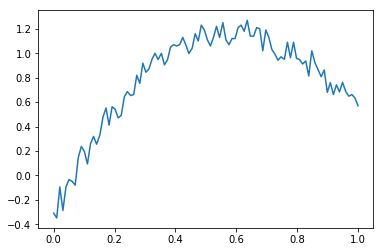

In [3]:
plt.plot(df.X.values, df.y.values)

### Linear Regression Code

The code below is verbatim copied from the code in *Etivity3_LinearClassification_18195326.ipnyb*.  Both example includes the _score()_ method, which performs the same calculation as _predict()_.

In [4]:
class MyLinearClassifier(object):
    
    """Implementation of simple Linear Classification algorithm based on the algorithm outlined
       in Learning from Data, Chapter 3"""
    
    # Simple initialiser to make sure we have a instance variable for weights
    def __init__(self):
        self.weights_ = np.empty((1,3))

    # Fit function to determine the weights to be used by the classifer
    # This algorithm is based on Learning from Data, p.86 
    def fit(self, X_in, y_in):
        
        # Add the bias coordinate to the input array
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))

        # Pseudo-code
        #w = (((X^transpose@X)^-1)X^transpose)@y       

        # Do this the long way for understanding for now
        # Shorthand Xd = np.linalg.pinv(X)
        Xt = np.transpose(X)
        Xd = np.matmul(np.linalg.inv(np.matmul(Xt, X)), Xt)

        self.weights_ = np.matmul(Xd, y_in)

    # Predicts a set of output classes (y^) based in the input attributes and this model's weights
    def predict(self, X_in):
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))
        y_hat = np.matmul(X, self.weights_)

        return np.sign(y_hat)
    
    
    def score(self, X_in):
        X = np.hstack((np.ones((X_in.shape[0],1)), X_in))
        y_hat = np.matmul(X, self.weights_)

        return y_hat

In [8]:
# TODO - Fix this function for this e-tivity.  Borrowed from Etivity 1 code
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [9]:
print(mlc.weights_)

[0.3916748 0.7894663]


### Initial Experiment

In [6]:
X = df.X.values
y = df.y.values

X = X.reshape(X.shape[0],1)

mlc = MyLinearClassifier()
mlc.fit(X, y)

y_hat = mlc.score(X)

[0.3916748 0.7894663]


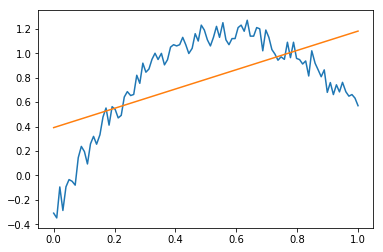

In [7]:
# These are 0 and 1, but just in case
x_min = X.min()
x_max = X.max()

print(mlc.weights_)

plt.plot(df.X.values, df.y.values)
plt.plot([x_min, x_max], [y_hat[0], y_hat[99]])
plt.show()

#y_min, y_max = decision_boundary(mlc.weights_, x_min, x_max)

### New Features

The input data looks parabolic, so choosing an appropriate parabolic tra might help to represent the data better for the 